**Goal: Predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.**

In [1]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to extract datetime features
import datetime as dt

In [3]:
# Importing the required libraries and overview of the dataset

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# For tuning the model
from sklearn.model_selection import GridSearchCV



In [4]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Path for  data test
test_data = "/content/drive/MyDrive/Spaceship Data/test.csv"


In [6]:
# Path for  data train
train_data = "/content/drive/MyDrive/Spaceship Data/train.csv"


In [7]:
# Read file into dataframe
df_test = pd.read_csv(test_data)

In [8]:
# Read file into dataframe
df_train = pd.read_csv(train_data)

In [9]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
df_train.shape

(8693, 14)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: >

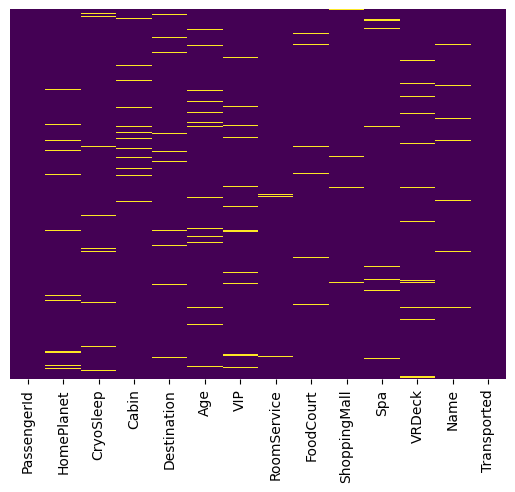

In [12]:
# Visualize if there are any missing values in the data
sns.heatmap(df_train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [13]:
# Calculate missing ratio for each column
missing_ratio = round(df_train.isnull().sum() / len(df_train) * 100,2)

print("Missing Ratio by Column:")
print(missing_ratio)

Missing Ratio by Column:
PassengerId     0.00
HomePlanet      2.31
CryoSleep       2.50
Cabin           2.29
Destination     2.09
Age             2.06
VIP             2.34
RoomService     2.08
FoodCourt       2.11
ShoppingMall    2.39
Spa             2.11
VRDeck          2.16
Name            2.30
Transported     0.00
dtype: float64


In [14]:
df_train.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [15]:
df_train[['Cabin_Deck','Cabin_Num','Cabin_Side']] = df_train['Cabin'].str.split('/', expand=True)

In [16]:
# create copy of df_train
df_train_3 = df_train.copy()

Transported:
- There are passengers that transported and there are passengers that did not transport
- It is more common that passengers transported

Name:
- There are two passengers that have the same name, Gollux Reedall

VRDeck:
- On average passengers spent 304 dollars on VR Deck
- 68% of passengers spent withing a range of 0 to 1449 dollars
- The most someone spent on the VR deck is 24,133 dollars

Spa:
- On average, passengers spent 311 dollars on the spa
- 68% of passengers spent within a range of 0 to 1,447 dollars
- The most someone spent on spa was 22,408 dollars
Shopping Mall:
- On average, passengers spent 173 dollars.
- 68% of passengers spent within the range of 0 to 777 dollars.
- The most someone spent was 23,492 dollars
Food court:
- On average passengers spent 458 dollars
- 68% of passengers spent within a range of 0 to 2069 dollars.
- The most someone spent was 29,813 dollars

Roomservice:
- On average, passengers spent 225 dollars
- 68% of passengers spent within a range of 0 to 809 dollars
- The most someone spent was 14,327 dollars.
VIP:
- There are two types of VIP
- The most popular is False, which means that most passengers were not VIP

Age:
- The average age is 29 years
- 68% of passengers had an age that ranged from 15 years until 44 years.
- The oldest passenger was 79 years old
- The youngest passenger was 19 years old

Destination:
- There are 3 types of destination.
- The most popular one is TRAPPIST-1e

Cabin (The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard):
- There are 6560 types of cabin
- The most popular one is G/734/S and it only repeats 8 times.

Home Planet:
- There are 3 types of home planet
- The most popular planet is Earth

CryoSleep:
- There are 2 types of cryosleep
- The most popular one is False. In other words, most people did not cryosleep



**Exploratory Data Analysis**

In [17]:
# Get the list of all categorical columns
categorical_columns = df_train.select_dtypes(include=['category', 'object','bool']).columns

In [18]:
print(categorical_columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Transported'],
      dtype='object')


In [19]:
categorical_columns_filtered = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']

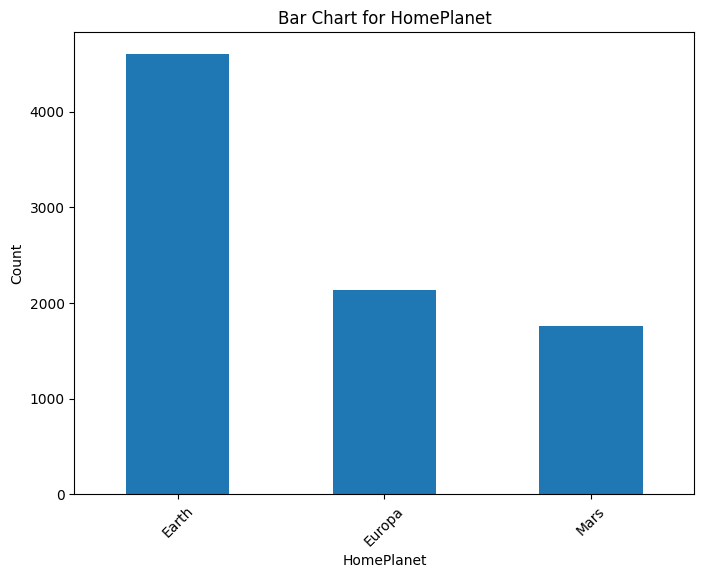

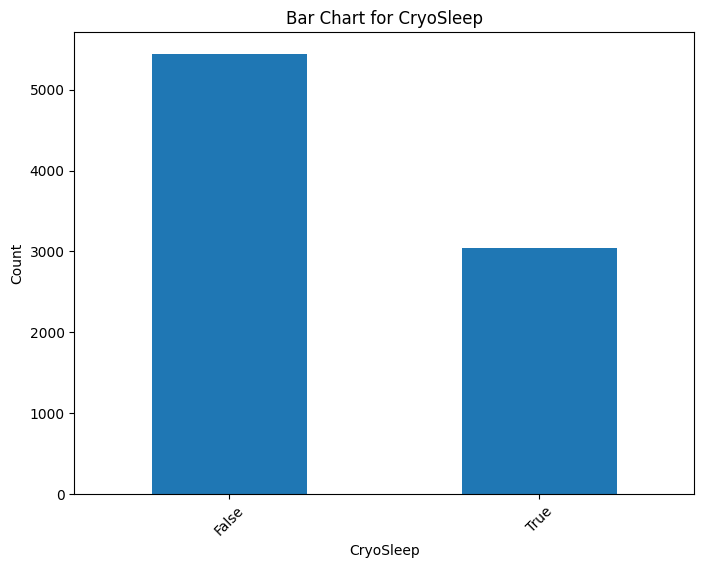

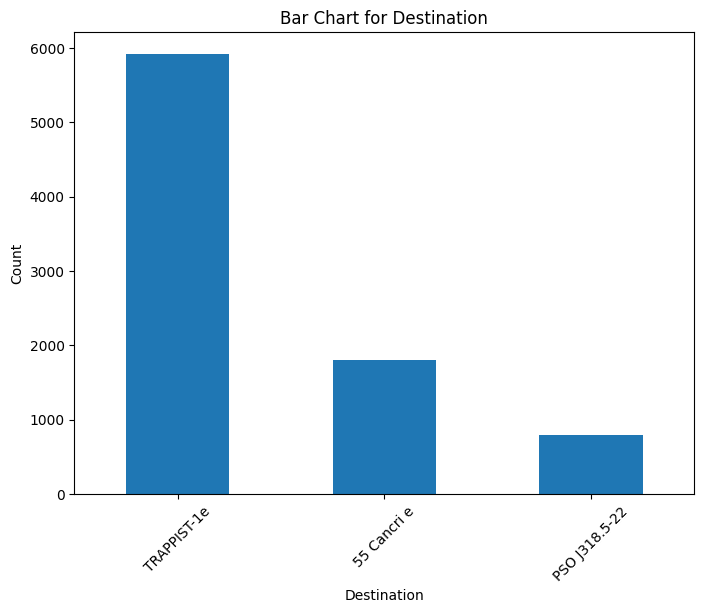

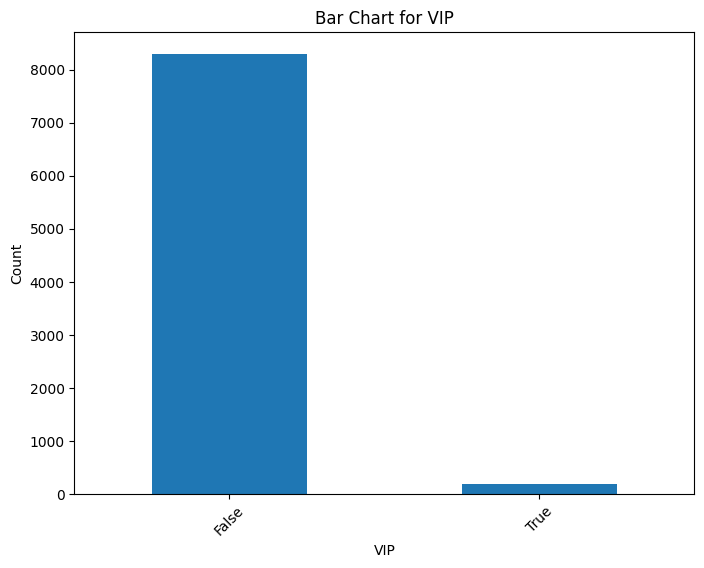

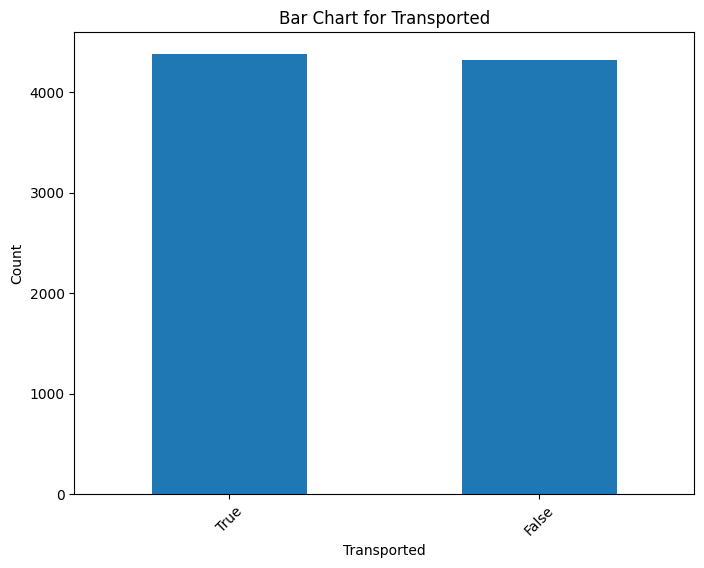

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Loop through each categorical column and create a bar chart
for column in categorical_columns_filtered:
    # Count the frequency of each category in the column
    category_counts = df_train[column].value_counts()

    # Create a bar chart
    category_counts.plot(kind='bar', figsize=(8, 6))

    # Customize the chart
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed

    # Show the chart
    plt.show()


The plot shows almost the number of passengers that were crysleep were almost double than the number of passengers that were not.

The plot shows that the number of passengers that came from Earth are almost double the amount of passengers that are from Europa.

The plot shows that the number of passengers traveling to TRAPPIST-1e are almost triple the number of passengers traveling to 55 Cancri e.

The plot show that the number of VIP passengers is almost ten times higher than the number of passengers that are not.

The plot show the number of people transported versus the number of people that were not transported is almost the same.
  

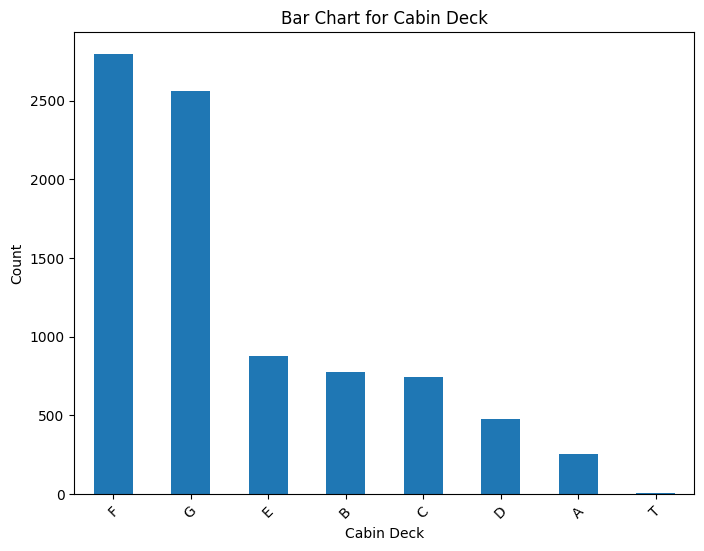

In [22]:
# Count the frequency of each category in the column
category_counts = df_train['Cabin_Deck'].value_counts()

# Create a bar chart
category_counts.plot(kind='bar', figsize=(8, 6))

# Customize the chart
plt.title(f'Bar Chart for Cabin Deck')
plt.xlabel('Cabin Deck')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the chart
plt.show()

The plot shows that the most number of passengers were on the F cabin deck.

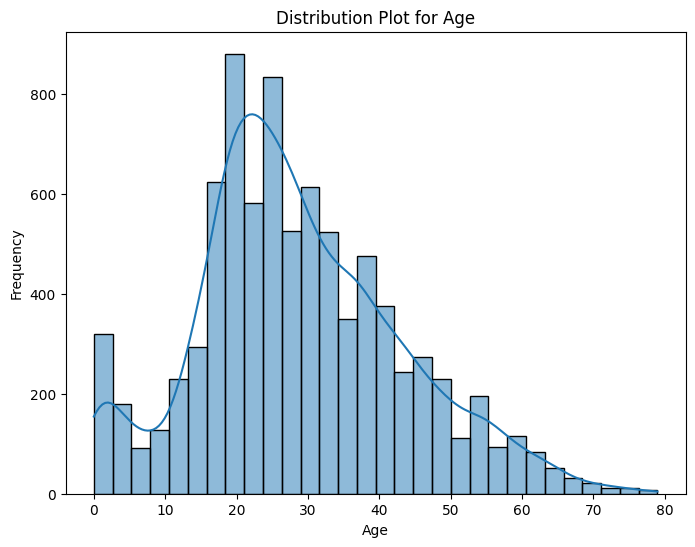

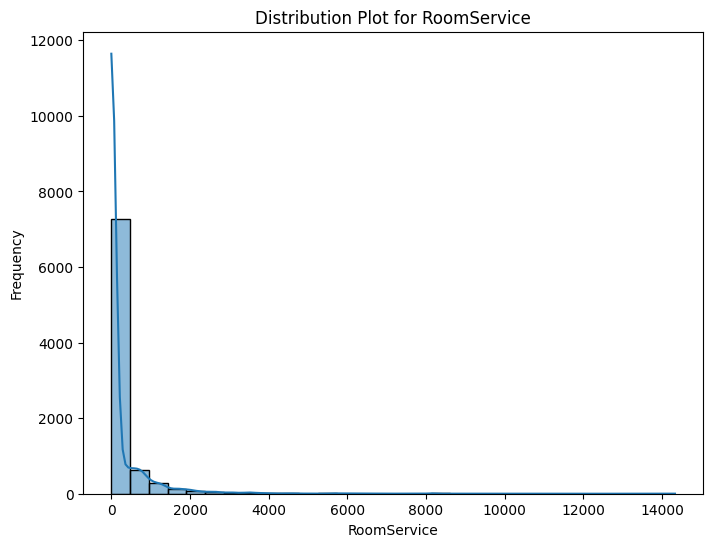

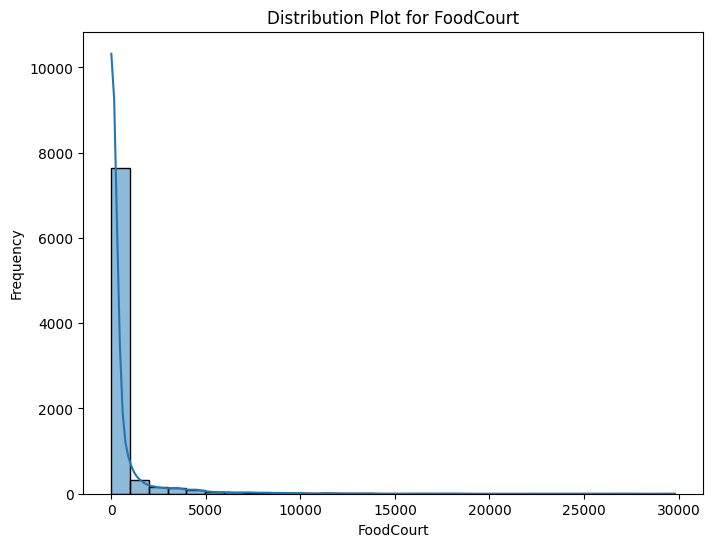

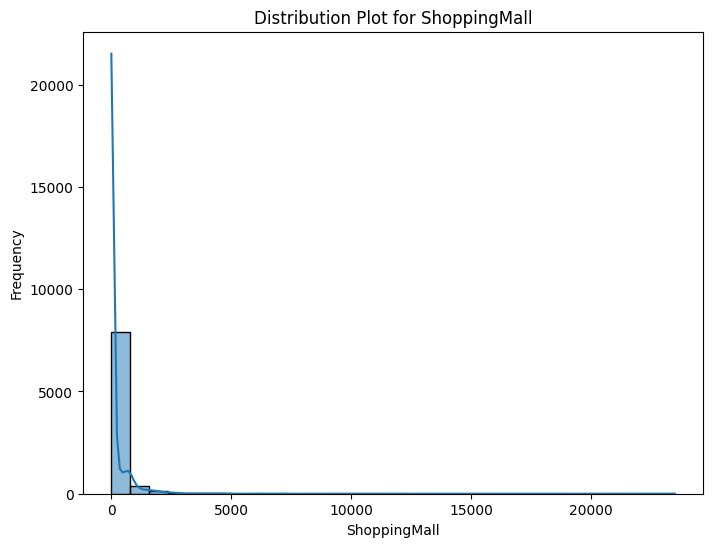

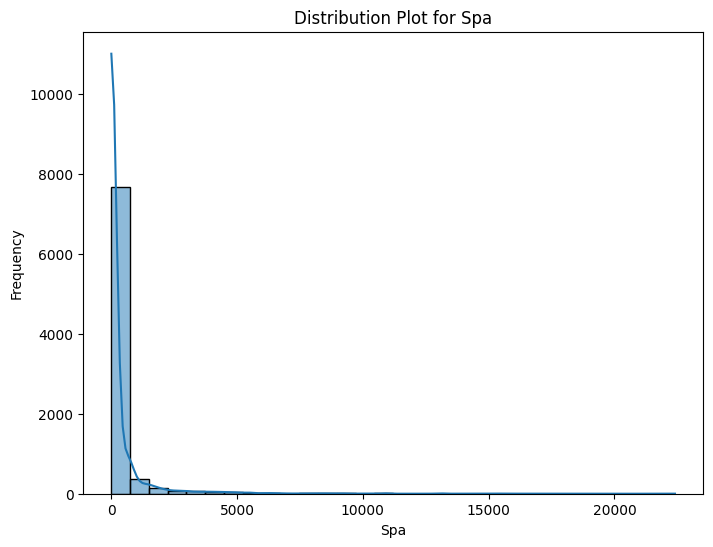

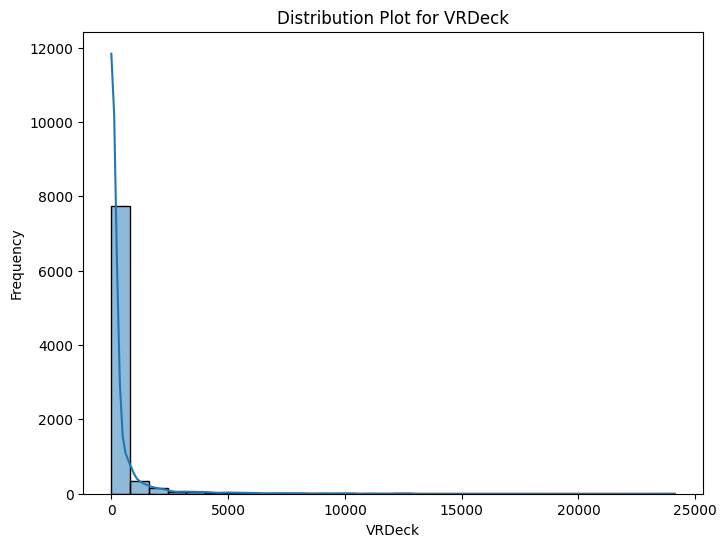

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called 'df' with numeric columns
# Replace 'df' with your actual DataFrame name

# Get the list of all numeric columns
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column and create a distribution plot
for column in numeric_columns:
    # Create a histogram or KDE (Kernel Density Estimate) plot
    plt.figure(figsize=(8, 6))
    sns.histplot(df_train[column], kde=True, bins=30)  # You can choose the number of bins as needed

    # Customize the plot
    plt.title(f'Distribution Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()



The bar plot shows that there are almost as many people from Europa as there are people from Mars. The amount of people from Earth are double the amount of people from Europa and Mars.

There is almost double the amount of people that were put into suspension during the trip than the amount of people that were not put into suspension during the trip.

People going to Trappist-1e are almost triple the amount of people going to 55 Cancri e. People going to 55 Cancri e are almost double the amount of people going to PSO J318.5-22.

There is a very low number of people that were VIP. It's almost 1/10 of the amount of people that were not VIP.

The distribution of age of people is positively skewed. Therefore, there is the presence of outliers that have high values. There is a high frequency of a young population.

The distribution of room service, VR Deck, Spa, Shopping Mall, and Food Court expenses is significantly positively skewed. This means that there are a few people that spent high sums of money on these bills.

In [ ]:
expenses = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

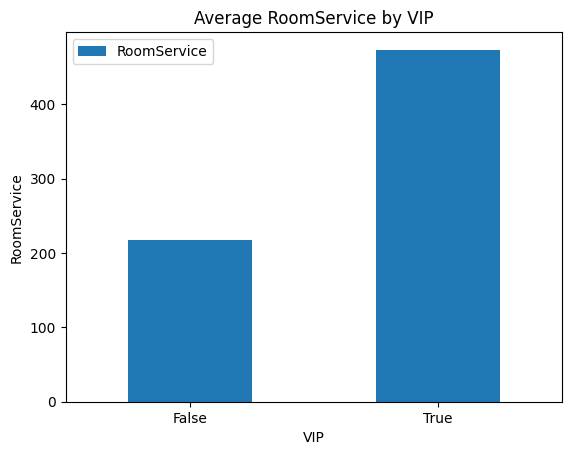

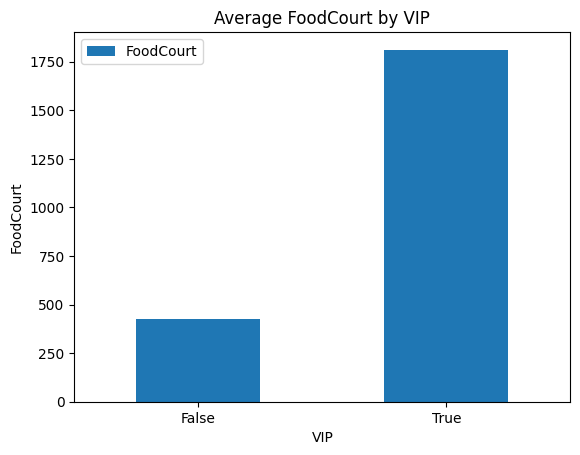

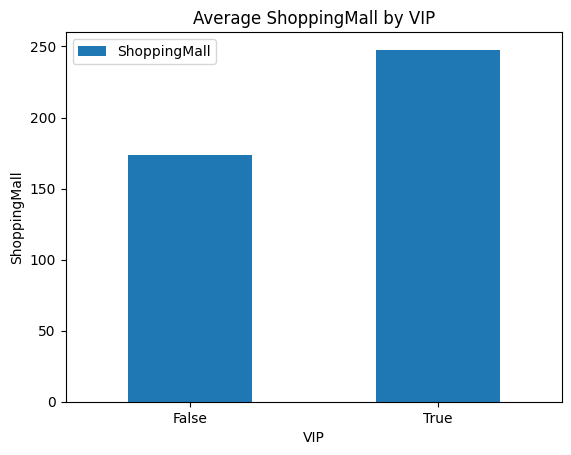

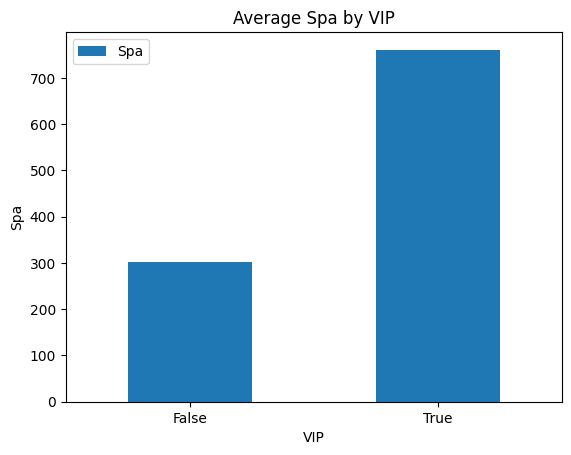

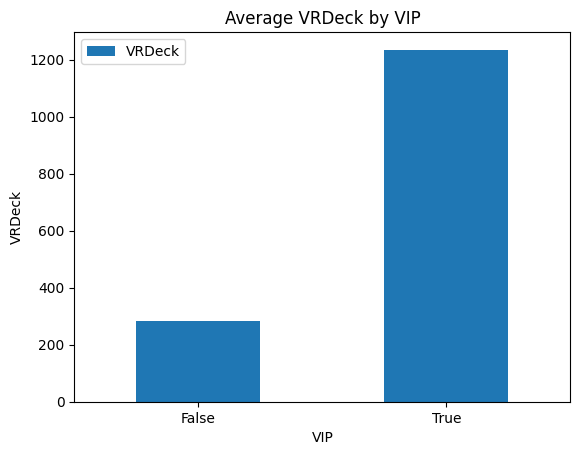

In [ ]:
for e in expenses:
  # find the mean of the food preparation time by day of the week and plot in a bar chart
  df_train.groupby('VIP')[e].mean().to_frame().plot(kind='bar')

  # rotate x labels to display horizontally
  plt.xticks(rotation=0)

  # assign title and labels to plot
  plt.title(f'Average {e} by VIP')
  plt.xlabel('VIP')
  plt.ylabel(f'{e}')

  # show plot
  plt.show()

The plot shows that VIP passengers spent the most on room service, VR Deck, Spa, Shopping Mall, and Food Court. They spent almost double than those that are not VIP.

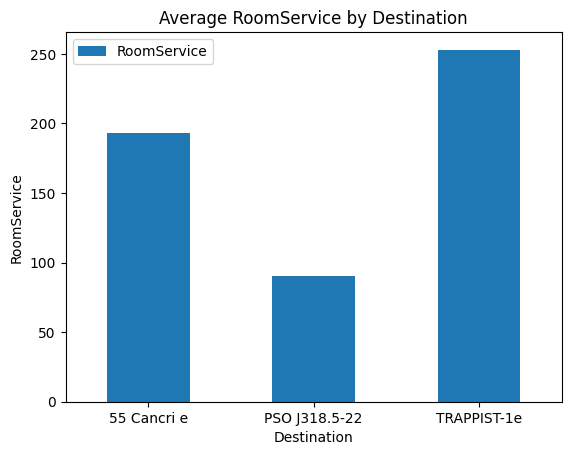

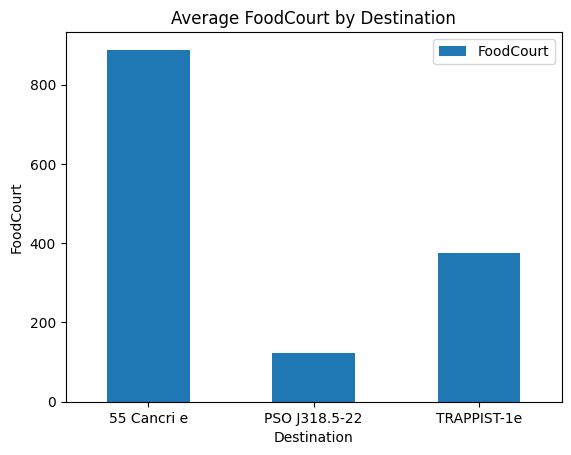

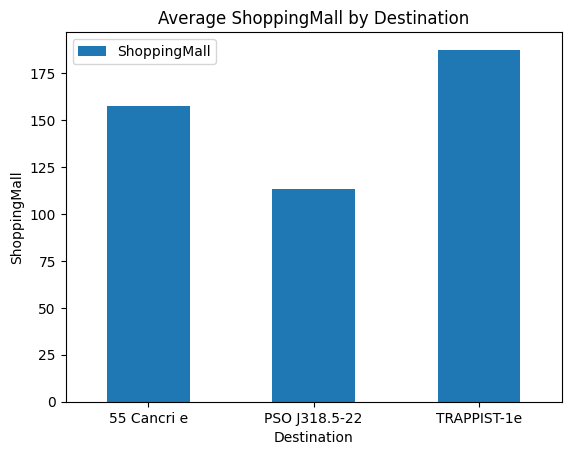

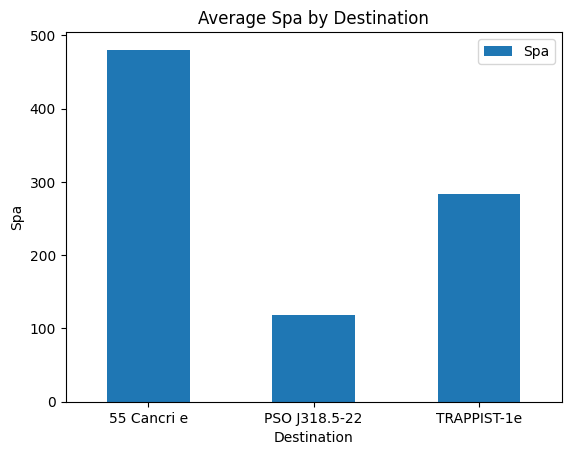

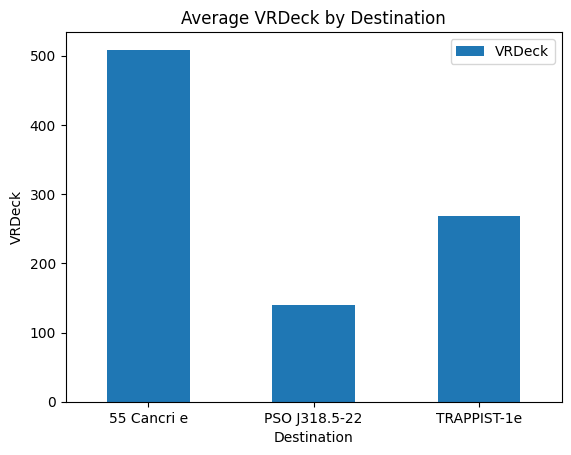

In [ ]:
for e in expenses:
  # find the mean of the food preparation time by day of the week and plot in a bar chart
  df_train.groupby('Destination')[e].mean().to_frame().plot(kind='bar')

  # rotate x labels to display horizontally
  plt.xticks(rotation=0)

  # assign title and labels to plot
  plt.title(f'Average {e} by Destination')
  plt.xlabel('Destination')
  plt.ylabel(f'{e}')

  # show plot
  plt.show()

The plot shows that people that had TRAPPIST-1e as their destination spent the most on room service. Those that spent the least were the ones heading to PSO J328.5-22.

The plot shows that people travelling to 55 Cancri e spent the most on Food Court. The least people spent on the Food Court were those that were travelling to PSO J318.5-22.

The plot shows that people travelling to TRAPPIST-1e spent the most on Shopping Mall. The ones that spent the least were those travelling to PSO J318-5.22.

The plot shows that people travelling to 55 Cancri-e spent the most on Spa. The ones that spent the least were those travelling to PSO J318.5-22.

The plot shows that people travelling to 55 Cancri e spent the most on VRDeck.

Overall, people travelling to PSO J318.5-22 spent the least in all categories. People travelling to 55 Cancri e spent the most in almost all categories.

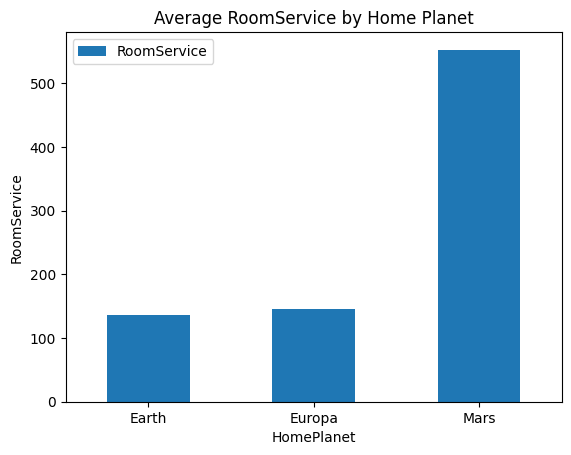

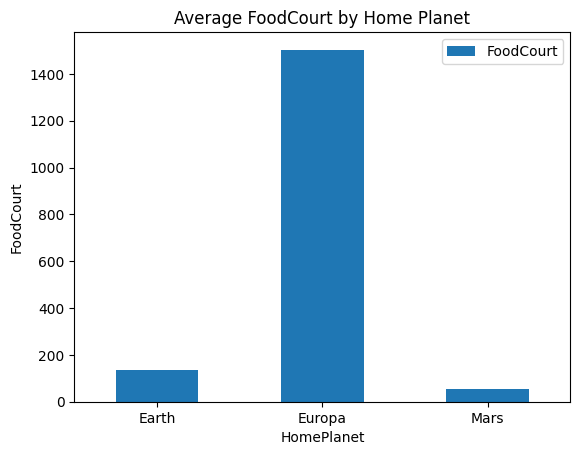

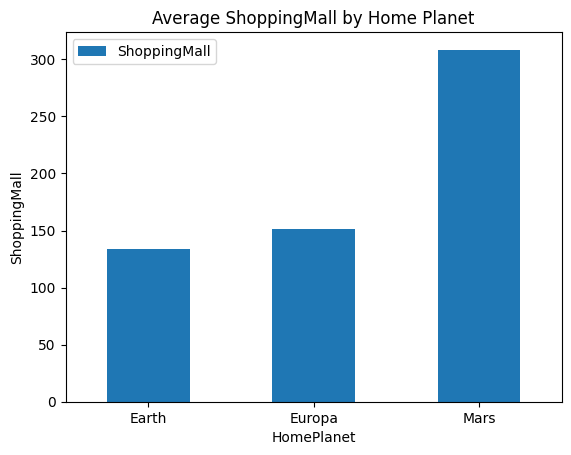

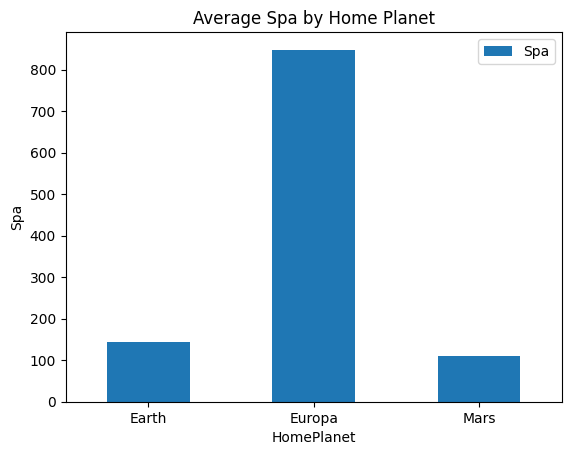

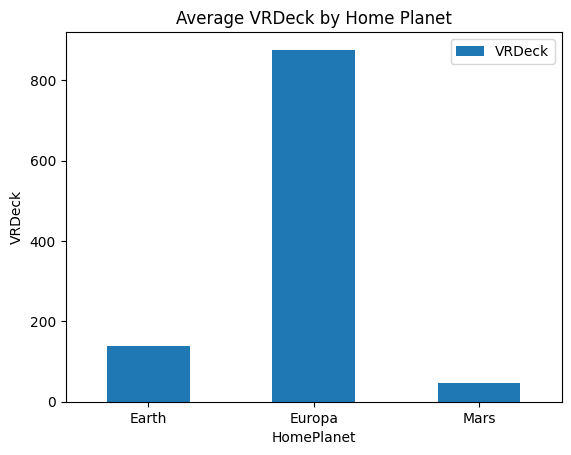

In [ ]:
for e in expenses:
  # find the mean of the food preparation time by day of the week and plot in a bar chart
  df_train.groupby('HomePlanet')[e].mean().to_frame().plot(kind='bar')

  # rotate x labels to display horizontally
  plt.xticks(rotation=0)

  # assign title and labels to plot
  plt.title(f'Average {e} by Home Planet')
  plt.xlabel('HomePlanet')
  plt.ylabel(f'{e}')

  # show plot
  plt.show()

The above plot shows that those travelling from Mars spent the most on room service. They spent almost three times the amount people travelling from Earth and Europa did.

The plot shows people from Europa spent the most on Food Court. Those from Mars spent the least.

The plot shows that people from Mars spent the most on Shopping Mall. People from Earth spent the least on the Shopping Mall.

People from Europa spent the most on Spa. People from Mars spent the least on Spa.

People from Europa spent the most on VR Deck. People from Mars spent the least on VR Deck.

Overall, people from Europa spent the most in most categories. The ones that didn't spend a lot in most categories were those from Mars.


In [ ]:
# Fill missing values
for column in df_train.columns:
    if df_train[column].dtype == 'object' or df_train[column].dtype == 'bool':
        # Fill missing values in object or boolean columns with mode
        df_train[column].fillna(df_train[column].mode()[0], inplace=True)
    elif np.issubdtype(df_train[column].dtype, np.number):
        # Check if the column is numeric
        if df_train[column].skew() > 1:
            # If the column has a skewed distribution, fill with median
            df_train[column].fillna(df_train[column].median(), inplace=True)
        else:
            # If not skewed, fill with mean
            df_train[column].fillna(df_train[column].mean(), inplace=True)

<Axes: >

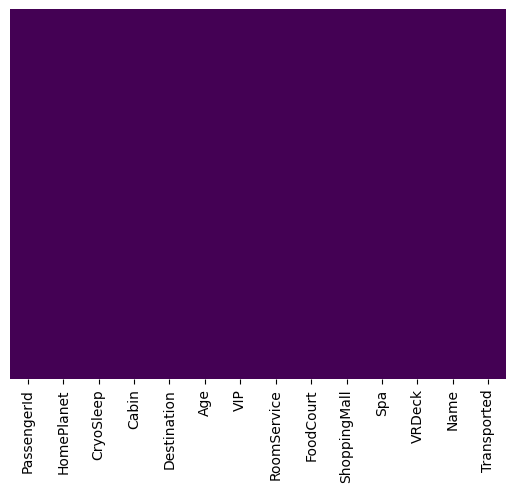

In [ ]:
# Visualize if there are any missing values in the data
sns.heatmap(df_train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

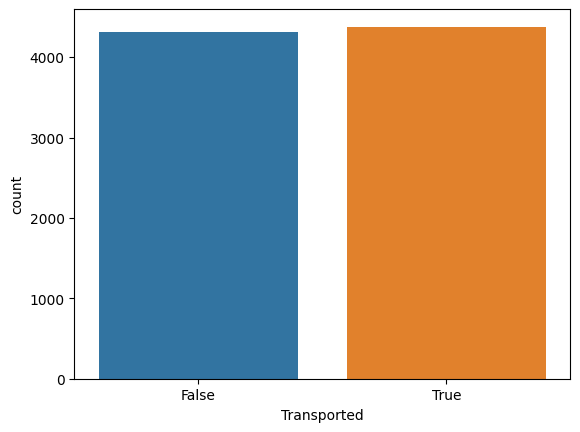

In [ ]:
# Visualize distribution of transported vs not transported
sns.countplot(data=df_train, x='Transported')
plt.show()

There seems to be an even distribution between transported versus not transported

In [ ]:
# compute correlation
corr_matrix = df_train.corr()

corr_matrix

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,1.000000,-0.070736,-0.078281,-0.244089,-0.205928,-0.207798,-0.198307,-0.192721,0.460132
Age,-0.070736,1.000000,0.091574,0.068425,0.127343,0.032846,0.121071,0.099551,-0.074249
VIP,-0.078281,0.091574,1.000000,0.056566,0.125499,0.018412,0.060991,0.123061,-0.037261
RoomService,-0.244089,0.068425,0.056566,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124
FoodCourt,-0.205928,0.127343,0.125499,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583
ShoppingMall,-0.207798,0.032846,0.018412,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391
Spa,-0.198307,0.121071,0.060991,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545
VRDeck,-0.192721,0.099551,0.123061,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874
Transported,0.460132,-0.074249,-0.037261,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000


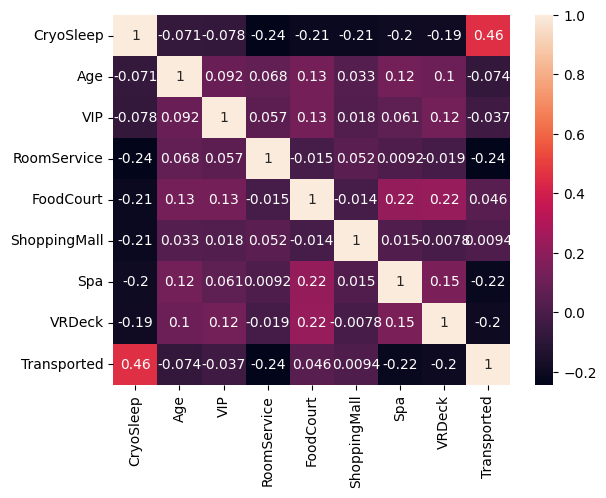

In [ ]:
# plot heatmap
# 'annot=True' returns the correlation values
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

There is a moderate positive relationship between transported and cryosleep.

There is a slight relationship between spa spending and foodcourt spending.

There is a slight positive relationship between VR Deck and food court spending.



In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB


In [ ]:
# List to store the boolean column names
boolean_columns = []

# Iterate through columns to identify boolean columns
for column in df_train.columns:
    if df_train[column].dtype == 'bool':
        # Add the name of the boolean column to the list
        boolean_columns.append(column)

# Convert identified boolean columns to object type
df_train[boolean_columns] = df_train[boolean_columns].astype('object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 950.9+ KB


In [ ]:
# Convert Age into integer
df_train['Age'] = df_train['Age'].astype('int')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
# Get a list of categorical variables
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
for c in categorical_columns:
  print(c)

Categorical Columns:
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name
Transported


In [ ]:
# Get a list of categorical variables
categorical_columns_test = df_test.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
for c in categorical_columns_test:
  print(c)


Categorical Columns:
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Extract the target column
y = df_train['Transported']

# Extract the Passenger_Id column (if needed)
# passenger_ids = df['Passenger_Id']

# Drop 'Transported' and 'Passenger_Id' columns from the DataFrame
X = df_train.drop(columns=['Transported', 'PassengerId'])

# Encode categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric columns
numeric_columns = X.select_dtypes(include=['float']).columns.tolist()
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Optionally, you can keep the 'Passenger_Id' column for reference in your analysis
# X_train['Passenger_Id'] = passenger_ids.loc[X_train.index]
# X_test['Passenger_Id'] = passenger_ids.loc[X_test.index]


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the classifiers
random_forest_classifier = RandomForestClassifier()
gradient_boosting_classifier = GradientBoostingClassifier()
support_vector_classifier = SVC(kernel='linear')

# Train and evaluate Random Forest Classifier
random_forest_classifier.fit(X_train, y_train)
rf_predictions = random_forest_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("Random Forest Classifier Results:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1:.2f}")
print()

# Train and evaluate Gradient Boosting Classifier
gradient_boosting_classifier.fit(X_train, y_train)
gb_predictions = gradient_boosting_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)

print("Gradient Boosting Classifier Results:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1:.2f}")
print()

# Train and evaluate Support Vector Classifier
support_vector_classifier.fit(X_train, y_train)
svc_predictions = support_vector_classifier.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions)
svc_recall = recall_score(y_test, svc_predictions)
svc_f1 = f1_score(y_test, svc_predictions)

print("Support Vector Classifier Results:")
print(f"Accuracy: {svc_accuracy:.2f}")
print(f"Precision: {svc_precision:.2f}")
print(f"Recall: {svc_recall:.2f}")
print(f"F1 Score: {svc_f1:.2f}")


Random Forest Classifier Results:
Accuracy: 0.79
Precision: 0.80
Recall: 0.78
F1 Score: 0.79

Gradient Boosting Classifier Results:
Accuracy: 0.79
Precision: 0.76
Recall: 0.85
F1 Score: 0.81

Support Vector Classifier Results:
Accuracy: 0.75
Precision: 0.75
Recall: 0.77
F1 Score: 0.76


**Imputation of Missing Values with Random Values**

In [26]:
import pandas as pd
import numpy as np

# Iterate through columns of the original DataFrame
for col in df_train_3.columns:
    # Check if the column is categorical
    if df_train_3[col].dtype == 'object' or df_train_3[col].dtype == 'bool':
        # Fill missing values in categorical columns with the mode
        df_train_3[col].fillna(df_train_3[col].mode()[0], inplace=True)
    else:
        # Find the indices of missing values in the current numerical column
        missing_indices = df_train_3[df_train_3[col].isnull()].index

        # Calculate the mean and standard deviation of the non-missing values in the current column
        mean = df_train_3[col].mean()
        std_dev = df_train_3[col].std()

        # Generate random values following a normal distribution with the calculated mean and standard deviation
        random_values = np.random.normal(mean, std_dev, len(missing_indices))

        # Fill missing values in the current numerical column with the generated random values
        df_train_3.loc[missing_indices, col] = random_values


<Axes: >

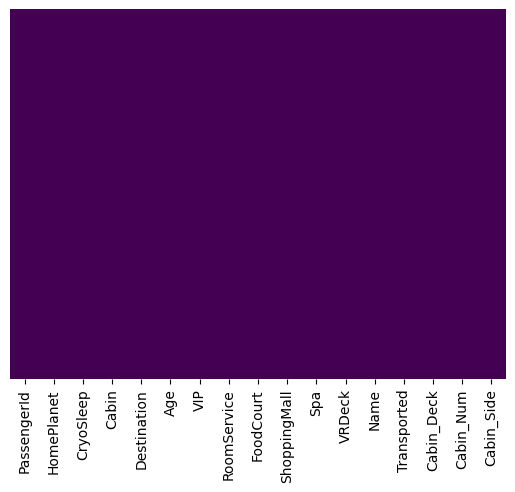

In [27]:
# Visualize if there are any missing values in the data
sns.heatmap(df_train_3.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [34]:
# creating a copy of df_train_3
df_train_3_copy = df_train_3.copy()

In [32]:
# Get a list of categorical variables
categorical_columns = df_train_3.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
for c in categorical_columns:
  print(c)

Categorical Columns:
PassengerId
HomePlanet
Cabin
Destination
Name
Cabin_Deck
Cabin_Num
Cabin_Side


In [38]:
# Get a list of categorical variables
categorical_columns_test = df_test.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
for c in categorical_columns_test:
  print(c)


Categorical Columns:
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Extract the target column
y = df_train_3['Transported']

# Extract the Passenger_Id column (if needed)
# passenger_ids = df['Passenger_Id']

# Drop 'Transported' and 'Passenger_Id' columns from the DataFrame
X = df_train_3.drop(columns=['Transported', 'PassengerId'])

# Encode categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric columns
numeric_columns = X.select_dtypes(include=['float']).columns.tolist()
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the classifiers
random_forest_classifier = RandomForestClassifier()
gradient_boosting_classifier = GradientBoostingClassifier()
support_vector_classifier = SVC(kernel='linear')

# Train and evaluate Random Forest Classifier
random_forest_classifier.fit(X_train, y_train)
rf_predictions = random_forest_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("Random Forest Classifier Results:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1:.2f}")
print()

# Train and evaluate Gradient Boosting Classifier
gradient_boosting_classifier.fit(X_train, y_train)
gb_predictions = gradient_boosting_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)

print("Gradient Boosting Classifier Results:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1:.2f}")
print()

# Train and evaluate Support Vector Classifier
support_vector_classifier.fit(X_train, y_train)
svc_predictions = support_vector_classifier.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions)
svc_recall = recall_score(y_test, svc_predictions)
svc_f1 = f1_score(y_test, svc_predictions)

print("Support Vector Classifier Results:")
print(f"Accuracy: {svc_accuracy:.2f}")
print(f"Precision: {svc_precision:.2f}")
print(f"Recall: {svc_recall:.2f}")
print(f"F1 Score: {svc_f1:.2f}")


Random Forest Classifier Results:
Accuracy: 0.78
Precision: 0.79
Recall: 0.78
F1 Score: 0.78

Gradient Boosting Classifier Results:
Accuracy: 0.79
Precision: 0.77
Recall: 0.82
F1 Score: 0.80

Support Vector Classifier Results:
Accuracy: 0.76
Precision: 0.74
Recall: 0.82
F1 Score: 0.78


**Filter Out Outliers from Dataset**

Use the Z-score or IQR (Interquartile Range) method to detect and remove outliers.

In [35]:
df_train_3_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Cabin_Deck    8693 non-null   object 
 15  Cabin_Num     8693 non-null   object 
 16  Cabin_Side    8693 non-null   object 
dtypes: bool(3), float64(6), object(8)
memory usage: 976.4+ KB


In [36]:
import pandas as pd
from scipy import stats

# Select columns from dataframe that have numerical data types, including float type columns
# Using df_train_3 because all missing values have been filled
numerical_columns = df_train_3_copy.select_dtypes(include=['number']).columns

# Calculate Z-scores for the numerical columns
# z scores is a measure of how many standard deviations a data point is from the mean
z_scores = np.abs(stats.zscore(df_train_3_copy[numerical_columns]))

# Define a threshold (e.g., -3 to 3)
# This defines what is considered an outlier
threshold = 3

# Create an intermediate DataFrame with the Z-scores
z_score_df = pd.DataFrame(z_scores, columns=numerical_columns)

# Filter the DataFrame to keep non-outliers
filtered_df = df_train_3_copy[(z_scores < threshold).all(axis=1)]



In [37]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7951 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7951 non-null   object 
 1   HomePlanet    7951 non-null   object 
 2   CryoSleep     7951 non-null   bool   
 3   Cabin         7951 non-null   object 
 4   Destination   7951 non-null   object 
 5   Age           7951 non-null   float64
 6   VIP           7951 non-null   bool   
 7   RoomService   7951 non-null   float64
 8   FoodCourt     7951 non-null   float64
 9   ShoppingMall  7951 non-null   float64
 10  Spa           7951 non-null   float64
 11  VRDeck        7951 non-null   float64
 12  Name          7951 non-null   object 
 13  Transported   7951 non-null   bool   
 14  Cabin_Deck    7951 non-null   object 
 15  Cabin_Num     7951 non-null   object 
 16  Cabin_Side    7951 non-null   object 
dtypes: bool(3), float64(6), object(8)
memory usage: 955.1+ KB


In [31]:
filtered_df.shape

(7951, 17)

In [39]:
# Get a list of categorical variables
categorical_columns = filtered_df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
for c in categorical_columns:
  print(c)

Categorical Columns:
PassengerId
HomePlanet
Cabin
Destination
Name
Cabin_Deck
Cabin_Num
Cabin_Side


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Extract the target column
y = filtered_df['Transported']

# Extract the Passenger_Id column (if needed)
# passenger_ids = df['Passenger_Id']

# Drop 'Transported' and 'Passenger_Id' columns from the DataFrame
X = filtered_df.drop(columns=['Transported', 'PassengerId'])

# Encode categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric columns
numeric_columns = X.select_dtypes(include=['float']).columns.tolist()
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [41]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the classifiers
random_forest_classifier = RandomForestClassifier()
gradient_boosting_classifier = GradientBoostingClassifier()
support_vector_classifier_linear = SVC(kernel='linear') # captures linear relationships in the data
support_vector_classifier_rbf = SVC(kernel='rbf') # RBF kernel can capture non-linear relationships in the data

# Train and evaluate Random Forest Classifier
random_forest_classifier.fit(X_train, y_train)
rf_predictions = random_forest_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("Random Forest Classifier Results:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1:.2f}")
print()

# Train and evaluate Gradient Boosting Classifier
gradient_boosting_classifier.fit(X_train, y_train)
gb_predictions = gradient_boosting_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)

print("Gradient Boosting Classifier Results:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1:.2f}")
print()

# Train and evaluate Support Vector Classifier
support_vector_classifier_linear.fit(X_train, y_train)
svc_predictions = support_vector_classifier_linear.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions)
svc_recall = recall_score(y_test, svc_predictions)
svc_f1 = f1_score(y_test, svc_predictions)

print("Support Vector Classifier Results:")
print(f"Accuracy: {svc_accuracy:.2f}")
print(f"Precision: {svc_precision:.2f}")
print(f"Recall: {svc_recall:.2f}")
print(f"F1 Score: {svc_f1:.2f}")
print()

# Train and evaluate Support Vector Classifier
support_vector_classifier_rbf.fit(X_train, y_train)
svc_predictions = support_vector_classifier_rbf.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions)
svc_recall = recall_score(y_test, svc_predictions)
svc_f1 = f1_score(y_test, svc_predictions)

print("Support Vector Classifier Results:")
print(f"Accuracy: {svc_accuracy:.2f}")
print(f"Precision: {svc_precision:.2f}")
print(f"Recall: {svc_recall:.2f}")
print(f"F1 Score: {svc_f1:.2f}")


Random Forest Classifier Results:
Accuracy: 0.79
Precision: 0.81
Recall: 0.78
F1 Score: 0.79

Gradient Boosting Classifier Results:
Accuracy: 0.80
Precision: 0.79
Recall: 0.84
F1 Score: 0.81

Support Vector Classifier Results:
Accuracy: 0.77
Precision: 0.78
Recall: 0.78
F1 Score: 0.78
Support Vector Classifier Results:
Accuracy: 0.59
Precision: 0.62
Recall: 0.54
F1 Score: 0.58


After using mean, median, and mode as the imputation method, the Random Forest Classifier and Gradient Boosting Classifier have higher accuracy than the Support Vector Classifier. Considering that I do not want to miss any instance when a passenger is being transported to an alternate dimension, I prioritize recall. Therefore, I would choose the Gradient Boosting Classifier model as it has the highest recall.

When generating random values that follow a normal distribution with the calculated mean and standard deviation, the model with the highest accuracy and highest recall is the Gradient Boosting Classifier. When using this same method of imputation and outliers are filtered, the model with the highest accuracy and recall is the Gradient Boosting Classifier.

I can conclude that the best performing model in all scenarios is the Gradient Boosting Classifier. This model scored the highest when missing values were randomly generated to follow a normal distribution and outliers were filtered out.
